<h1><b>Simulación del tiro de un proyectil.</b></h1>

<img src="/Img/canon2.png" width=300>

<i> Sin tener en cuenta la resistencia del aire, las ecuaciones del movimiento de un proyectil son: </i>

$$ x=V_{o}cos\left ( \theta  \right )t $$
$$y = h_{o}+V_{o}sen\left ( \theta \right )t-\frac{1}{2}gt^{2}$$

<i>Donde:</i>
<ul>
<li>𝜃: Es el ángulo de tiro.</li>
<li>𝑉𝑜: Es la velocidad inicial.</li>
<li>ℎ𝑜: Es la altura donde esta el proyectil.</li>
<li>𝑡: Es el tiempo.</li>
</ul>

### Librerias.

In [1]:
from math import cos, sin, pi
from numpy import linspace
import matplotlib.pyplot as plt

### Declaramos variables:

In [2]:
𝜃 = 60   # Ángulo de tiro, grados
v0 = 200 # Velocidad inicial, m/s
yo = 10  # Altura inicial, metros
g = 9.81 # Aceleración de la gravedad, m/s2

### Creamos una lista que representará nuestro tiempo:

In [3]:
Iteraciones_total = 1000 # Número de iteraciones
Iteraciones = linspace(0, Iteraciones_total, 2 * Iteraciones_total)

### Usamos la función lambda para crear las ecuaciones de posición del proyectil:

In [4]:
Y = lambda t: -(0.5 * g * (t ** 2)) + (v0 * sin(𝜃 * pi / 180) * t) + yo
X = lambda t: (v0 * cos(𝜃 * pi / 180) * t)

### Creamos una lista de las coordenadas de nuestro proyectil para valores de altura positivos (hasta que el proyectil impacta con el suelo):

In [5]:
y = [Y(t) for t in Iteraciones if Y(t) > 0]
x = [X(t) for t in Iteraciones if Y(t) > 0]

### Graficamos los resultados:

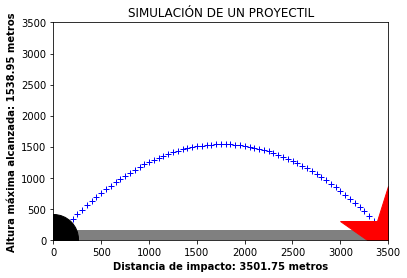

In [6]:
# Activamos el modo interactivo:
plt.ion()

# Configuramos el plot:
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(x, y, 'b+')

# Calculamos el ancho y la altura maxima de nuestro plot y lo limitamos:
x_max = max(max(x),max(y))
x_min = min(min(x),min(y))
ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

# Usamos una linea recta para dibujar el piso:
ax.axhline(y=0, linewidth=20, color='gray', linestyle="-")

# Posicion del cañon:
plt.plot(0, yo, 'ko', markersize=50.0)

for i in range(len(y)):
    # Simulamos el proyectil:
    line.set_xdata(x[:i])
    line.set_ydata(y[:i])
    fig.canvas.draw()
    fig.canvas.flush_events()

    if i == len(y)-1:
        # Ponemos titulo, etiquetas en Y y en X:
        plt.title('SIMULACIÓN DE UN PROYECTIL')
        plt.xlabel(f'Distancia de impacto: {round(max(x),2)} metros', weight='bold',color='k')
        plt.ylabel(f'Altura máxima alcanzada: {round(max(y), 2)} metros',weight='bold', color='k')
        # Posicion de la explosión:
        plt.plot(x[-1], y[-1], 'r*', markersize=100.0)
